Import Required Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load and Explore Dataset

In [75]:
df = pd.read_csv("rwsi_data.csv")
df.head()

,SessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,February,Android,Chrome,NaN,2.0,Returning,False,No
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,February,iOS,NaN,Europe,4.0,Returning,False,No
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,NaN,February,iOS,Internet Explorer,NaN,4.0,Returning,True,No


In [76]:
df.shape

(12330, 20)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SessionID              12330 non-null  object 
 1   AdClicks               11467 non-null  float64
 2   InfoSectionCount       11961 non-null  float64
 3   InfoSectionTime        11961 non-null  float64
 4   HelpPageVisits         12084 non-null  float64
 5   HelpPageTime           12084 non-null  float64
 6   ItemBrowseCount        11837 non-null  float64
 7   ItemBrowseTime         11837 non-null  float64
 8   ExitRateFirstPage      12207 non-null  float64
 9   SessionExitRatio       12084 non-null  float64
 10  PageEngagementScore    11961 non-null  float64
 11  HolidayProximityIndex  11837 non-null  float64
 12  VisitMonth             12330 non-null  object 
 13  UserPlatformID         11837 non-null  object 
 14  WebClientCode          11714 non-null  object 
 15  Ma

In [78]:
df.describe()

,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,TrafficSourceCode
count,11467.000000,11961.000000,11961.000000,12084.000000,12084.000000,11837.000000,11837.000000,12207.000000,12084.000000,11961.000000,11837.000000,11714.000000
mean,1.993459,2.318201,80.871460,0.502565,34.420615,31.717749,1196.681677,0.022234,0.043130,5.885423,0.061806,4.069489
std,1.420444,3.326956,177.208946,1.271441,141.209531,44.390208,1918.148954,0.048551,0.048623,18.557293,0.199556,4.031417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000
50%,2.000000,1.000000,8.000000,0.000000,0.000000,18.000000,598.250000,0.003125,0.025222,0.000000,0.000000,2.000000
75%,3.000000,4.000000,92.933333,0.000000,0.000000,38.000000,1469.666667,0.016923,0.050000,0.000000,0.000000,4.000000
max,4.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,20.000000


MonetaryConversion
No     10422
Yes     1908
Name: count, dtype: int64


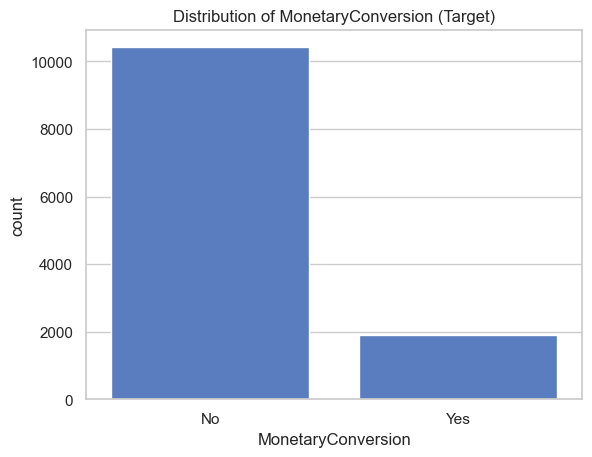

In [95]:
print(df['MonetaryConversion'].value_counts())
sns.countplot(x='MonetaryConversion', data=df)
plt.title("Distribution of MonetaryConversion (Target)")
plt.show()

The dataset is imbalanced, as there are more instances of class 0 than class 1.
Class 0: 10,422 → ≈ 84%
Class 1: 1,908 → ≈ 16%

This means the model may become biased toward predicting No Conversion, resulting in high accuracy but poor recall for the minority class (1).

To fix this issue, at the end of this notebook we applied SMOTE (Synthetic Minority Oversampling Technique) for RandomForest

In [80]:
# Check missing
df.isnull().sum()

SessionID                  0
AdClicks                 863
InfoSectionCount         369
InfoSectionTime          369
HelpPageVisits           246
HelpPageTime             246
ItemBrowseCount          493
ItemBrowseTime           493
ExitRateFirstPage        123
SessionExitRatio         246
PageEngagementScore      369
HolidayProximityIndex    493
VisitMonth                 0
UserPlatformID           493
WebClientCode            616
MarketZone               616
TrafficSourceCode        616
UserCategory             493
IsWeekendVisit             0
MonetaryConversion         0
dtype: int64

In [81]:
# Check duplicate values
df.duplicated().sum()

np.int64(0)

In [82]:
# Missing value percentage
miss_percent = df.isnull().sum() / len(df) * 100
miss_percent.sort_values(ascending=False)

AdClicks                 6.999189
MarketZone               4.995945
TrafficSourceCode        4.995945
WebClientCode            4.995945
UserPlatformID           3.998378
ItemBrowseCount          3.998378
HolidayProximityIndex    3.998378
ItemBrowseTime           3.998378
UserCategory             3.998378
PageEngagementScore      2.992701
InfoSectionCount         2.992701
InfoSectionTime          2.992701
HelpPageTime             1.995134
SessionExitRatio         1.995134
HelpPageVisits           1.995134
ExitRateFirstPage        0.997567
SessionID                0.000000
VisitMonth               0.000000
IsWeekendVisit           0.000000
MonetaryConversion       0.000000
dtype: float64

Outlier Detection using Boxplots

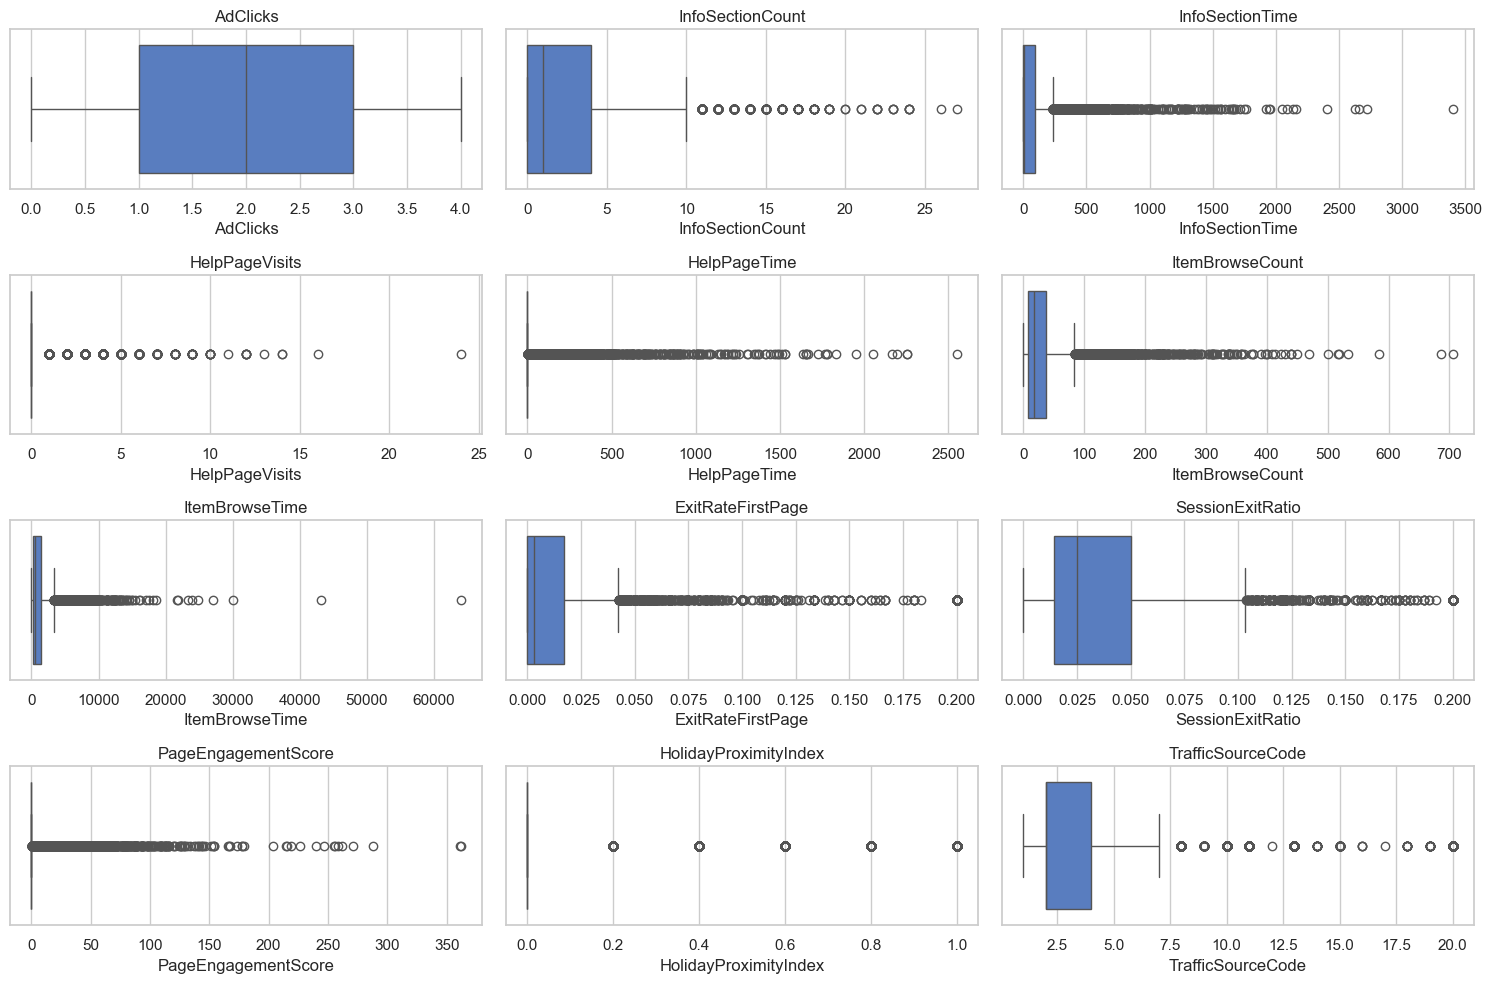

In [83]:
num_features = ['AdClicks','InfoSectionCount','InfoSectionTime','HelpPageVisits',
                    'HelpPageTime','ItemBrowseCount','ItemBrowseTime','ExitRateFirstPage',
                    'SessionExitRatio','PageEngagementScore','HolidayProximityIndex','TrafficSourceCode']
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Correlation Matrix
Visualizes the correlation between all numerical features

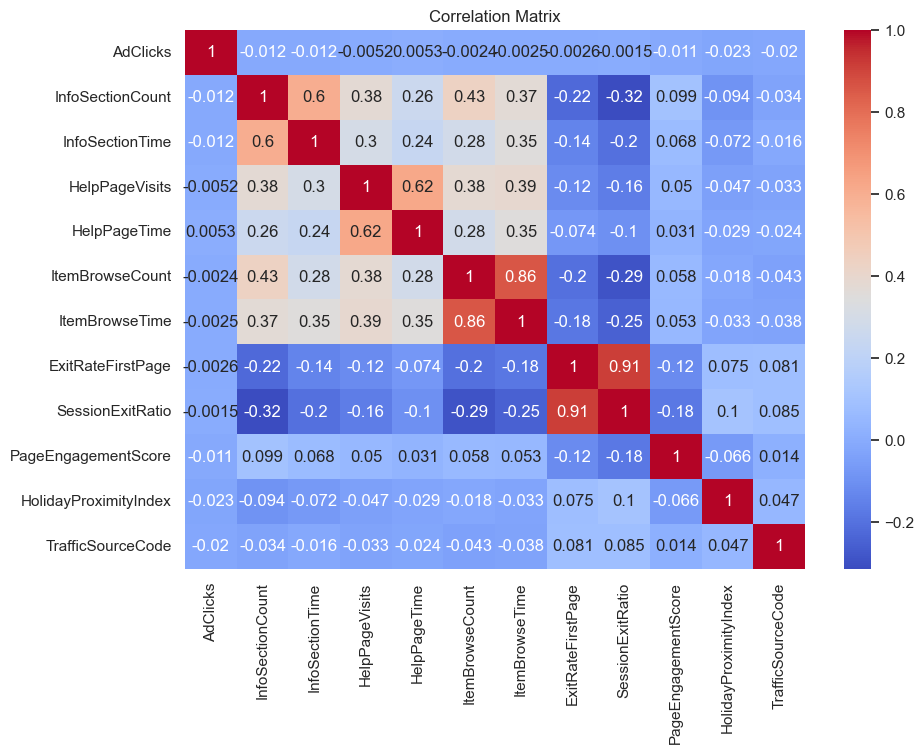

In [96]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,7))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Data Cleaning and Preprocessing

In [84]:
from sklearn.preprocessing import LabelEncoder
df_clean = df.drop(columns=['SessionID'])
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_clean.select_dtypes(include=['object', 'bool']).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna('Unknown')
le = LabelEncoder()
for col in cat_cols:
    df_clean[col] = le.fit_transform(df_clean[col].astype(str))
print("Remaining Missing Values are \n", df_clean.isnull().sum())


Remaining Missing Values are 
 AdClicks                 0
InfoSectionCount         0
InfoSectionTime          0
HelpPageVisits           0
HelpPageTime             0
ItemBrowseCount          0
ItemBrowseTime           0
ExitRateFirstPage        0
SessionExitRatio         0
PageEngagementScore      0
HolidayProximityIndex    0
VisitMonth               0
UserPlatformID           0
WebClientCode            0
MarketZone               0
TrafficSourceCode        0
UserCategory             0
IsWeekendVisit           0
MonetaryConversion       0
dtype: int64


Feature and Target Split

In [85]:
X = df_clean.drop(columns=['MonetaryConversion'])
y = df_clean['MonetaryConversion']

Train-Test Split

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [87]:
print(X_train)

       AdClicks  InfoSectionCount  InfoSectionTime  HelpPageVisits  \
4263        2.0               8.0       732.250000             0.0   
5905        2.0               0.0         0.000000             0.0   
9434        0.0               0.0         0.000000             0.0   
3505        3.0               2.0       338.000000             0.0   
2067        2.0               0.0         0.000000             0.0   
...         ...               ...              ...             ...   
2419        1.0               4.0        69.000000             1.0   
1200        2.0               4.0        16.666667             0.0   
2398        1.0               0.0         0.000000             0.0   
11106       4.0               0.0         0.000000             0.0   
11430       2.0               1.0        57.500000             0.0   

       HelpPageTime  ItemBrowseCount  ItemBrowseTime  ExitRateFirstPage  \
4263            0.0             34.0     1345.755952           0.005128   
5905     

Handling Class Imbalance using SMOTE

In [88]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Before SMOTE class counts:\n", y_train.value_counts())
print("After SMOTE class counts:\n", y_train_res.value_counts())


Before SMOTE class counts:
 MonetaryConversion
0    8338
1    1526
Name: count, dtype: int64
After SMOTE class counts:
 MonetaryConversion
0    8338
1    8338
Name: count, dtype: int64


Feature Scaling

In [89]:
from sklearn.preprocessing import StandardScaler
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
print(X_train.head())

      AdClicks  InfoSectionCount  InfoSectionTime  HelpPageVisits  \
4263  0.001706          1.740320         3.676622       -0.390786   
5905  0.001706         -0.695165        -0.445758       -0.390786   
9434 -1.461741         -0.695165        -0.445758       -0.390786   
3505  0.733430         -0.086294         1.457096       -0.390786   
2067  0.001706         -0.695165        -0.445758       -0.390786   

      HelpPageTime  ItemBrowseCount  ItemBrowseTime  ExitRateFirstPage  \
4263     -0.241057         0.073969        0.097024          -0.351843   
5905     -0.241057        -0.627302       -0.533257           0.364684   
9434     -0.241057        -0.627302       -0.594346          -0.457215   
3505     -0.241057        -0.323418        0.022683          -0.200371   
2067     -0.241057        -0.300043       -0.299372          -0.457215   

      SessionExitRatio  PageEngagementScore  HolidayProximityIndex  \
4263         -0.611979             0.353282               3.736731   


Logistic Regression Model

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train_res, y_train_res)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # probability for ROC-AUC

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[1473  611]
 [ 144  238]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      2084
           1       0.28      0.62      0.39       382

    accuracy                           0.69      2466
   macro avg       0.60      0.66      0.59      2466
weighted avg       0.81      0.69      0.73      2466

ROC-AUC Score: 0.6713051823416506


C:\Users\Vardan Kaushik\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest 

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))
importances = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Features:\n", importances.head(10))


Confusion Matrix:
 [[1912  172]
 [ 169  213]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      2084
           1       0.55      0.56      0.56       382

    accuracy                           0.86      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.86      0.86      0.86      2466

ROC-AUC Score: 0.8213878365205856

Top 10 Features:
                 Feature  Importance
9   PageEngagementScore    0.429323
8      SessionExitRatio    0.076547
1      InfoSectionCount    0.066314
6        ItemBrowseTime    0.055575
5       ItemBrowseCount    0.044372
2       InfoSectionTime    0.040915
15    TrafficSourceCode    0.039033
12       UserPlatformID    0.038838
7     ExitRateFirstPage    0.038127
0              AdClicks    0.036081


XGBoost Classifier

C:\Users\Vardan Kaushik\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [13:15:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[2000   84]
 [ 166  216]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.72      0.57      0.63       382

    accuracy                           0.90      2466
   macro avg       0.82      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466

ROC-AUC Score: 0.9154980353930722


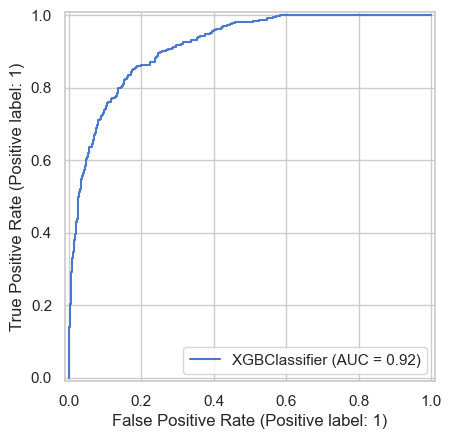

In [94]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
xgb_clf = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)[:,1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Plot ROC Curve
RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
